<center><h1>Module 2 Assignment</h1></center>

# Choose a dataset

Choose a dataset from [NYC Open Data](https://opendata.cityofnewyork.us/) that is available in CSV format (look at the format labels in the list of datasets). Choose one that has at least 2 numerical value columns and 1 string value column. 

If it's a CSV file you may be able to directly read it with pandas
```
pd.read_csv(url)
```

If it is a compressed file (.zip, .gz, etc.), download the zip and unpack it, then read it in with pandas
```
pd.read_csv(<filename>.csv)
```

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read the data
school = pd.read_csv('schoolSAT.csv')

## Display top 7 rows of the dataframe in your notebook

In [35]:
school.head(7)

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
4,01M509,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN
5,01M515,Lower East Side Preparatory High School,154.0,314.0,532.0,314.0
6,01M539,"New Explorations into Sci, Tech and Math HS",47.0,568.0,583.0,568.0


## Count number of null values (if any) for each column

In [33]:
school.isnull().sum()

School Name              0
Number of Test Takers    0
Critical Reading Mean    0
dtype: int64

## Remove all but 2 numerical values columns of your choice and display the reducted dataframe.

In [36]:
school = school[['School Name','Number of Test Takers','Critical Reading Mean']]
school.head(7)

,School Name,Number of Test Takers,Critical Reading Mean
0,Henry Street School for International Studies,31.0,391.0
1,University Neighborhood High School,60.0,394.0
2,East Side Community High School,69.0,418.0
3,SATELLITE ACADEMY FORSYTH ST,26.0,385.0
4,CMSP HIGH SCHOOL,NaN,NaN
5,Lower East Side Preparatory High School,154.0,314.0
6,"New Explorations into Sci, Tech and Math HS",47.0,568.0


In [37]:
#drop the null values in each row
school.dropna(inplace=True)
school.head()

,School Name,Number of Test Takers,Critical Reading Mean
0,Henry Street School for International Studies,31.0,391.0
1,University Neighborhood High School,60.0,394.0
2,East Side Community High School,69.0,418.0
3,SATELLITE ACADEMY FORSYTH ST,26.0,385.0
5,Lower East Side Preparatory High School,154.0,314.0


## Display the average, median, and standard deviation of each of your numerical columns

In [38]:
school.describe()

,Number of Test Takers,Critical Reading Mean
count,386.000000,386.000000
mean,103.658031,404.248705
std,145.264496,56.815631
min,7.000000,291.000000
25%,35.000000,370.000000
50%,54.000000,392.500000
75%,92.750000,419.000000
max,1047.000000,674.000000


## Plot two of the numerical columns one against the other in a scatter plot

<function matplotlib.pyplot.show(close=None, block=None)>

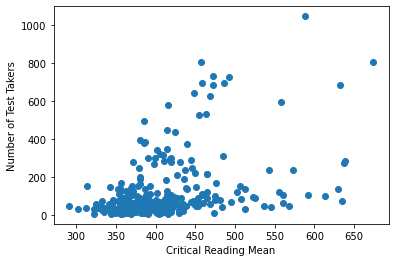

In [39]:
takers = school['Number of Test Takers']
read = school['Critical Reading Mean']
plt.scatter(x=read, y=takers)
plt.ylabel('Number of Test Takers')
plt.xlabel('Critical Reading Mean')
plt.show

## Plot the data distribution of all your numerical columns in histogram and boxplot

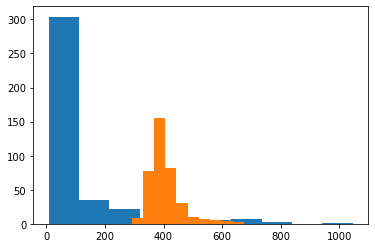

In [84]:
plt.hist(takers)

plt.hist(read)

plt.show()

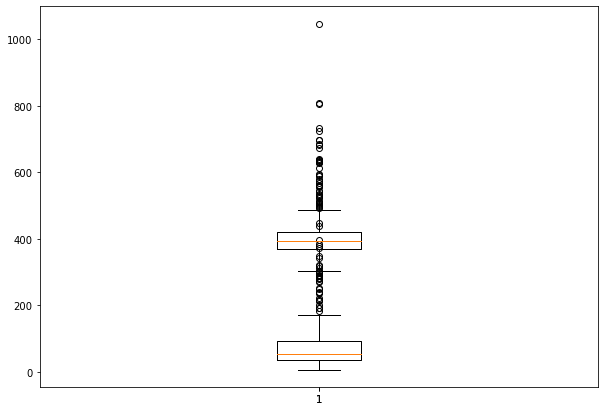

In [45]:
fig = plt.figure(figsize =(10, 7))

plt.boxplot(takers)

plt.boxplot(read)

plt.show()

## Create a new column in the same dataframe that is raised power of two of an existing column
Example:
![power_of_two](images/ex1.jpeg)


In [47]:
#create a new column with power of Test Takers
school['Power of Test Takers'] = np.power((school['Number of Test Takers']),2)
school.head()

,School Name,Number of Test Takers,Critical Reading Mean,Power of Test Takers
0,Henry Street School for International Studies,31.0,391.0,961.0
1,University Neighborhood High School,60.0,394.0,3600.0
2,East Side Community High School,69.0,418.0,4761.0
3,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,676.0
5,Lower East Side Preparatory High School,154.0,314.0,23716.0


# Citi Bike investigation
![citi-bike](images/citibike.jpeg)
>Citi Bike is the largest bike share program in the US, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Choose a citibikes dataset (one or two months, earlier datasets are convenient because they are smaller)

Example for downloading September 2017 Citibike data:
```
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

In [75]:
bike = pd.read_csv('201709-citibike-tripdata.csv')
bike.info()
bike.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878098 entries, 0 to 1878097
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               float64
 14  gender                   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 214.9+ MB


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,1
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,1
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,1
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,1
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,1


## Count the number of missing values of each column

In [73]:
bike.isna().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 207468
gender                          0
dtype: int64

In [78]:
#drop the column with nan values (return it without nan values)
bike.dropna(inplace=False)
round(bike.describe(),2)

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,age
count,1878098.00,1878098.00,1878098.00,1878098.00,1878098.00,1878098.00,1878098.00,1878098.00,1670630.00,1878098.00,1670630.00
mean,997.09,1388.94,40.74,-73.98,1380.26,40.74,-73.98,24263.05,1979.53,1.12,41.47
std,8104.11,1357.40,0.04,0.06,1355.08,0.08,0.13,5437.54,11.71,0.58,11.71
min,61.00,72.00,0.00,-74.03,72.00,0.00,-74.09,14529.00,1885.00,0.00,20.00
25%,392.00,362.00,40.72,-74.00,362.00,40.72,-74.00,18910.00,1972.00,1.00,32.00
50%,659.00,490.00,40.74,-73.99,487.00,40.74,-73.99,25959.00,1982.00,1.00,39.00
75%,1136.00,3147.00,40.76,-73.98,3144.00,40.76,-73.98,28978.00,1989.00,1.00,49.00
max,2215580.00,3637.00,40.81,0.00,3637.00,40.81,0.00,31979.00,2001.00,2.00,136.00


## Who rides citibikes? Show ridership distribution by gender, user type, and age
Process the data and plot your answers

In [83]:
import datetime

#add new column 'age', based on their birth year
bike['age'] = datetime.datetime.now().year - bike['birth year']

#replace gender
bike['gender'].replace([0,1,2],['Unknown','Male','Female'],inplace=True)
bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,male,28.0
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,male,33.0
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,male,52.0
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,male,28.0
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,male,34.0


## What is the average number of trips per day?

## What is the average trip duration?

## What days of the week are most rides taken on?
Process the data and plot your answer

## What hour of the day are most rides taken on?
Process the data and plot your answer

## Is there correlation between age and trip duration?

## What are the top 10 pair of stations that our riders use as a start & stopping point?

## Come up with your own question on the Citibike data usage and formulate a hypothesis

### Example:
### "Women are less likely than men to choose biking for commuting."
>
>Null Hypothesis: 

>The proportion of men biking on weekends is the same or higher than the proportion of women biking on weekends



## Work with your dataset and show your findings to help answer your question

# Submit Instructions
Rename this notebook to `mod2_<first_name>_<last_name>.ipynb` and push this to your branch in module-2 repository

```
git checkout -b tanyani
git add mod2_tanya_nabila.ipynb
git commit -m 'submit mod2 assignment for Tanya Nabila'
git push
```